In [1]:
!nvidia-smi

Thu Jan 23 03:16:19 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
import tensorflow as tf

In [32]:
import tensorflow_datasets as tfds

#importing helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [34]:
#Importing the MNIST Fashion dataset which contains 70000 images of sneakers and shirts, we will split it into 60000 for training and 10000 for testing
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True, split=['train[:90%]','train[90%:]', 'test'])
train_dataset, validation_dataset, test_dataset = dataset

In [6]:
#Adding the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [35]:
#Checking the dataset
num_train_examples = len(train_dataset)
num_validation_examples = len(validation_dataset)
num_test_examples = len(test_dataset)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_validation_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 54000
Number of validation examples: 6000
Number of test examples:     10000


In [38]:
# #Normalizing the images in the range [0,1] from [0,255]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# # The map function applies the normalize function to each element in the train
# # and test datasets
train_dataset =  train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# # The first time you use the dataset, the images will be loaded from disk
# # Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
validation_dataset = validation_dataset.cache()
test_dataset  =  test_dataset.cache()

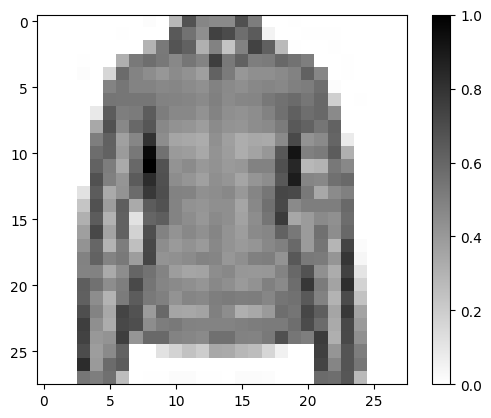

In [39]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

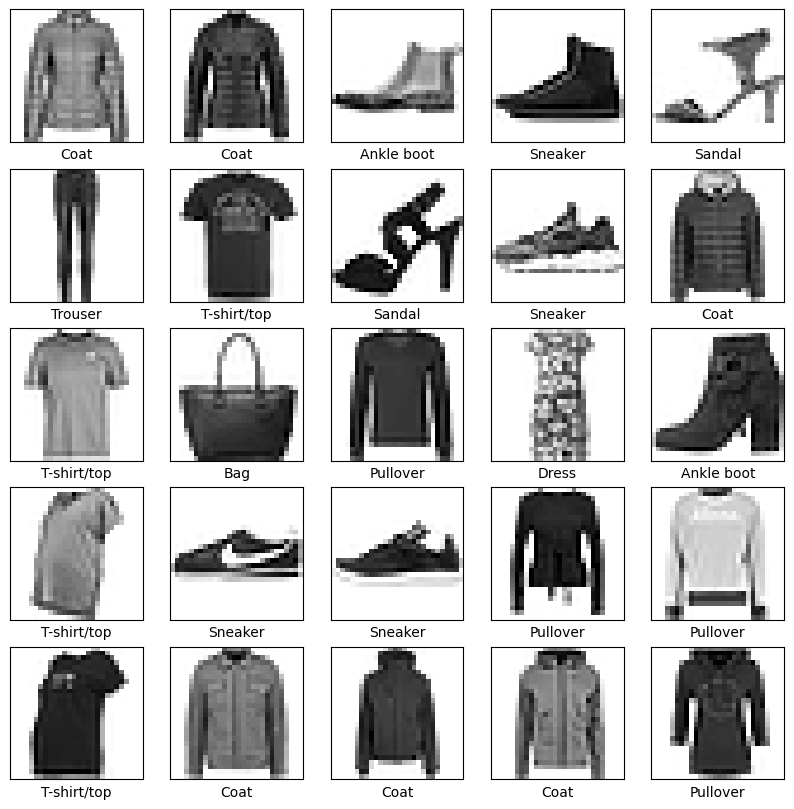

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().shuffle(num_train_examples).batch(BATCH_SIZE)
validation_dataset = validation_dataset.cache().batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7939 - loss: 0.5770 - val_accuracy: 0.8938 - val_loss: 0.2875
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8959 - loss: 0.2868 - val_accuracy: 0.9082 - val_loss: 0.2482
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9162 - loss: 0.2258 - val_accuracy: 0.9165 - val_loss: 0.2311
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9271 - loss: 0.1900 - val_accuracy: 0.9182 - val_loss: 0.2134
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9412 - loss: 0.1602 - val_accuracy: 0.9292 - val_loss: 0.2012
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9498 - loss: 0.1344 - val_accuracy: 0.9253 - val_loss: 0.2079
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9577 - loss: 0.1146 - val_accuracy: 0.9307 - val_loss: 0.2094
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9657 - loss: 0.0925 -

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9159 - loss: 0.3044
Accuracy on test dataset: 0.9142000079154968


In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [19]:
predictions.shape


(32, 10)

In [20]:
predictions[0]

array([3.4245599e-07, 2.1200791e-12, 4.4557601e-03, 3.2460898e-10,
       9.8996502e-01, 1.9587389e-11, 5.5789929e-03, 1.2772881e-09,
       3.8641652e-08, 5.0713247e-08], dtype=float32)

In [21]:
np.argmax(predictions[0])


4

In [22]:
test_labels[0]


4

In [23]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

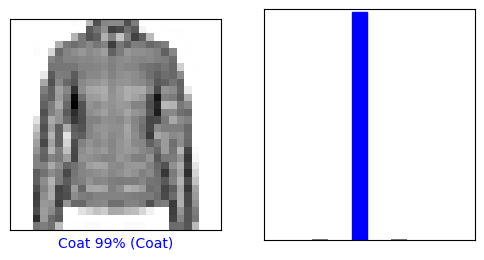

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

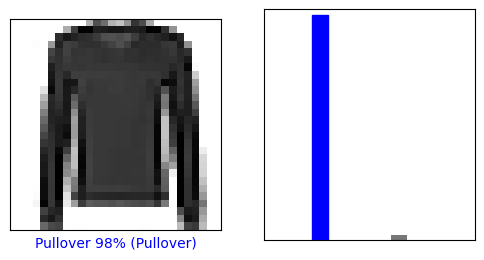

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

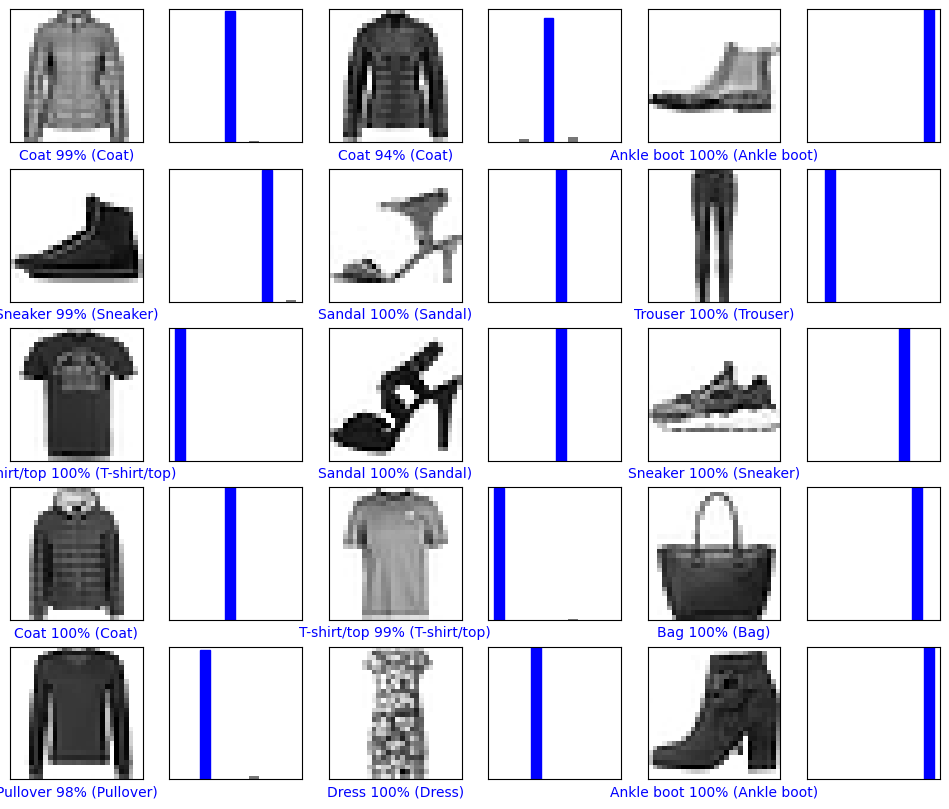

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [28]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
[[3.4245534e-07 2.1200912e-12 4.4557429e-03 3.2460898e-10 9.8996502e-01
  1.9587389e-11 5.5789873e-03 1.2772784e-09 3.8641652e-08 5.0713247e-08]]


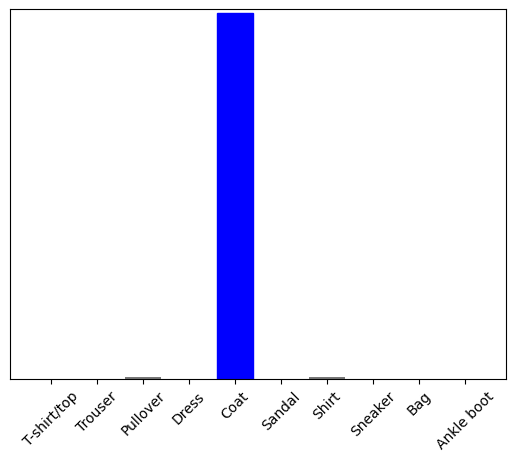

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)